### 1. 패키지 설치 및 불러오기

In [2]:
# 패키지 설치
!pip install yfinance --quiet

In [3]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

### 2. ETF 데이터 수집 및 수익률 데이터 생성

- 티커 리스트

['SPY', 'FEZ', 'EWJ', 'EEM', 'IEF', 'TLT', 'TIP', 'GLD', 'DBC', 'DBA', 'IYR']

- 가격 데이터 시작일: 2007년 5월 1일
- 가격 데이터 종료일: 2023년 10월 31일
- 주간 단위로 리샘플링 및 종가 기준으로 백테스팅 수행

In [5]:
def price_etf(tickers):
    price_data = pd.DataFrame()

    for ticker in tickers:
        try:
            data = yf.download(ticker, start='2007-05-01', end='2025-08-02', progress=False)
            
            # 빈 DataFrame이면 스킵
            if data.empty:
                print(f"[EMPTY] {ticker} returned no data.")
                continue
            
            # Adj Close 우선, 없으면 Close 사용
            col = 'Adj Close' if 'Adj Close' in data.columns else 'Close'
            adj_close = data[[col]].rename(columns={col: ticker})
            
            price_data = pd.concat([price_data, adj_close], axis=1)
        
        except Exception as e:
            print(f"[ERROR] Failed to download {ticker}: {e}")
    
    price_data.index = pd.to_datetime(price_data.index)
    price_data = price_data.resample('W').last()

    return price_data

tickers = ['SPY', 'FEZ', 'EWJ', 'EEM', 'IEF', 'TLT', 'TIP', 'GLD', 'DBC', 'DBA', 'IYR']

df = price_etf(tickers)
print(df.tail())

C:\Users\USER\AppData\Local\Temp\ipykernel_24232\1206301934.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2007-05-01', end='2025-08-02', progress=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_24232\1206301934.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2007-05-01', end='2025-08-02', progress=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_24232\1206301934.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2007-05-01', end='2025-08-02', progress=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_24232\1206301934.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2007-05-01', end='2025-08-02', progress=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_24232\1206301934.py:6: FutureWarning: YF.download

Price              SPY        FEZ        EWJ        EEM        IEF        TLT  \
Ticker             SPY        FEZ        EWJ        EEM        IEF        TLT   
Date                                                                            
2025-07-06  625.340027  59.919998  74.599998  48.759998  94.451454  86.638809   
2025-07-13  623.619995  60.080002  72.360001  48.259998  94.012886  85.463303   
2025-07-20  627.580017  59.240002  71.809998  49.080002  94.092628  84.915398   
2025-07-27  637.099976  60.310001  75.680000  49.509998  94.431519  86.100868   
2025-08-03  621.719971  57.150002  74.070000  48.200001  95.680000  87.820000   

Price              TIP         GLD        DBC        DBA        IYR  
Ticker             TIP         GLD        DBC        DBA        IYR  
Date                                                                 
2025-07-06  109.096748  307.140015  22.280001  25.889999  95.800003  
2025-07-13  109.066826  309.140015  22.510000  25.770000  95.489998  
2

In [6]:
# ETF 가격 데이터 호출 함수 
### 예전 방식 ############
# def price_etf(tickers):
#     etf = yf.Tickers(tickers)
#     data = etf.history(start='2007-05-01', end='2025-06-30', actions=False)
#     data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
#     data = data.droplevel(0, axis=1).resample('W').last()

#     return data

In [7]:
df = df.droplevel(0, axis=1)
df

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2007-05-06,107.141235,32.910416,43.001350,28.377600,53.075329,50.950500,59.335194,68.190002,21.399393,22.067791,44.038971
2007-05-13,107.098595,32.699287,43.329140,28.655157,52.972935,50.714706,59.199692,66.449997,21.281862,21.826515,44.347477
2007-05-20,108.348106,33.213596,42.464947,28.859928,52.563625,49.990105,58.710747,65.519997,21.349022,21.438757,41.756004
2007-05-27,107.687904,33.051178,42.554340,28.609665,52.397320,49.668110,58.775593,64.940002,21.491741,22.403847,41.766293
2007-06-03,109.384590,33.641289,43.746342,29.606169,52.095135,49.412888,58.490196,66.440002,21.575693,22.739904,44.002968
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,625.340027,59.919998,74.599998,48.759998,94.451454,86.638809,109.096748,307.140015,22.280001,25.889999,95.800003
2025-07-13,623.619995,60.080002,72.360001,48.259998,94.012886,85.463303,109.066826,309.140015,22.510000,25.770000,95.489998
2025-07-20,627.580017,59.240002,71.809998,49.080002,94.092628,84.915398,109.435928,308.390015,22.530001,26.030001,95.800003


In [8]:
# 주간 수익률 데이터
rets = df.pct_change().fillna(0)
rets

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2007-05-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-05-13,-0.000398,-0.006415,0.007623,0.009781,-0.001929,-0.004628,-0.002284,-0.025517,-0.005492,-0.010933,0.007005
2007-05-20,0.011667,0.015728,-0.019945,0.007146,-0.007727,-0.014288,-0.008259,-0.013995,0.003156,-0.017765,-0.058436
2007-05-27,-0.006093,-0.004890,0.002105,-0.008672,-0.003164,-0.006441,0.001105,-0.008852,0.006685,0.045016,0.000246
2007-06-03,0.015756,0.017854,0.028011,0.034831,-0.005767,-0.005139,-0.004856,0.023098,0.003906,0.015000,0.053552
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,0.016962,0.007228,-0.009033,0.013932,-0.003452,-0.001093,-0.000192,0.019653,0.022018,-0.016711,0.017741
2025-07-13,-0.002751,0.002670,-0.030027,-0.010254,-0.004643,-0.013568,-0.000274,0.006512,0.010323,-0.004635,-0.003236
2025-07-20,0.006350,-0.013981,-0.007601,0.016991,0.000848,-0.006411,0.003384,-0.002426,0.000889,0.010089,0.003246


In [9]:
#  **연환산 수익률(annualized return)** -> 단순 단리방식
rets*52

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2007-05-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-05-13,-0.020695,-0.333593,0.396384,0.508605,-0.100320,-0.240651,-0.118751,-1.326885,-0.285597,-0.568536,0.364275
2007-05-20,0.606680,0.817879,-1.037132,0.371594,-0.401792,-0.742966,-0.429481,-0.727766,0.164098,-0.923804,-3.038653
2007-05-27,-0.316854,-0.254286,0.109466,-0.450926,-0.164522,-0.334941,0.057434,-0.460313,0.347623,2.340839,0.012812
2007-06-03,0.819290,0.928432,1.456586,1.811213,-0.299894,-0.267205,-0.252496,1.201109,0.203125,0.780000,2.784712
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,0.882020,0.375858,-0.469713,0.724473,-0.179481,-0.056861,-0.009969,1.021980,1.144958,-0.868972,0.922557
2025-07-13,-0.143029,0.138855,-1.561393,-0.533224,-0.241453,-0.705531,-0.014262,0.338608,0.536803,-0.241018,-0.168270
2025-07-20,0.330203,-0.727031,-0.395248,0.883551,0.044107,-0.333372,0.175978,-0.126156,0.046203,0.524642,0.168816


In [10]:
#  **연환산 수익률(annualized return)** -> 더 정확한 복리 방식
(1 + rets)**52 - 1

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2007-05-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-05-13,-0.020487,-0.284424,0.484207,0.658865,-0.095539,-0.214323,-0.112091,-0.739228,-0.249026,-0.435417,0.437644
2007-05-20,0.827901,1.251313,-0.649226,0.448130,-0.331923,-0.526841,-0.350313,-0.519490,0.178025,-0.606277,-0.956328
2007-05-27,-0.272268,-0.225014,0.115554,-0.364213,-0.151922,-0.285394,0.059082,-0.370206,0.414061,8.871783,0.012893
2007-06-03,1.254443,1.509894,3.206197,4.932132,-0.259746,-0.235011,-0.223619,2.278700,0.224740,1.168873,14.070033
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,1.397971,0.454274,-0.376151,1.053350,-0.164555,-0.055304,-0.009921,1.751281,2.103513,-0.583686,1.495450
2025-07-13,-0.133442,0.148745,-0.795117,-0.414902,-0.214955,-0.508533,-0.014163,0.401454,0.705829,-0.214612,-0.155105
2025-07-20,0.389799,-0.519131,-0.327503,1.401585,0.045074,-0.284265,0.192057,-0.118658,0.047265,0.685416,0.183579


In [11]:
cols = rets.columns
cols

Index(['SPY', 'FEZ', 'EWJ', 'EEM', 'IEF', 'TLT', 'TIP', 'GLD', 'DBC', 'DBA',
       'IYR'],
      dtype='object', name='Ticker')

### 3. Shrinkage 방법론을 활용한 공분산 행렬 노이즈 제거
- 노이즈란
- 샘플 공분산 행렬은 우리가 가진 과거 수익률 데이터를 기반으로 계산되는데,

- 📉 데이터가 적거나,
- 📈 자산 수가 많을 때,
-👉 "진짜 상관관계" 대신 우연히 나타난 패턴을 반영할 가능성이 커져

- 💡 예시로 이해해보자
- 자산이 100개인데, 우리가 가진 수익률 데이터는 52주(=52행)뿐이야.
- 이럴 경우 공분산 행렬의 크기는 100×100인데, 우리가 추정하는 데 쓸 수 있는 정보는 너무 적어.
- 그러면 어떤 자산 쌍에서는 상관관계가 0.9, 어떤 곳은 -0.8처럼 나올 수 있는데...

- ➡️ 이건 실제로 그런 게 아니라 그냥 우연히 그렇게 나온 거야.

In [13]:
# 공분산 행렬
cov_mat = rets.cov() * 52

# 변동성
vols = rets.std() * np.sqrt(52)

In [14]:
vols

Ticker
SPY    0.184720
FEZ    0.248961
EWJ    0.183260
EEM    0.238137
IEF    0.067361
TLT    0.145098
TIP    0.062286
GLD    0.166836
DBC    0.192586
DBA    0.164606
IYR    0.258223
dtype: float64

In [15]:
rets.rolling(52).std() * np.sqrt(52)  # 참고데이터

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2007-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,0.186578,0.202019,0.221372,0.177992,0.075152,0.153516,0.050279,0.164562,0.172391,0.153453,0.167259
2025-07-13,0.186531,0.201722,0.222858,0.177591,0.074956,0.153306,0.050152,0.164528,0.171388,0.153500,0.160859
2025-07-20,0.185171,0.196877,0.221983,0.172869,0.074813,0.153070,0.050141,0.164274,0.168427,0.150083,0.160377


In [16]:
cov_mat

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Ticker,,,,,,,,,,,
SPY,0.034121,0.037758,0.025283,0.034173,-0.002775,-0.006814,0.000749,0.001921,0.014874,0.008941,0.036582
FEZ,0.037758,0.061982,0.033633,0.046992,-0.003815,-0.009410,0.000867,0.006221,0.020848,0.014455,0.041450
EWJ,0.025283,0.033633,0.033584,0.030271,-0.001609,-0.004114,0.000979,0.002045,0.011812,0.007555,0.025834
EEM,0.034173,0.046992,0.030271,0.056709,-0.003192,-0.007927,0.000842,0.008498,0.022786,0.014004,0.039218
IEF,-0.002775,-0.003815,-0.001609,-0.003192,0.004538,0.008822,0.003048,0.002517,-0.002771,-0.001353,-0.000849
TLT,-0.006814,-0.009410,-0.004114,-0.007927,0.008822,0.021053,0.005691,0.003816,-0.007675,-0.004128,-0.001981
TIP,0.000749,0.000867,0.000979,0.000842,0.003048,0.005691,0.003880,0.003182,0.001168,0.000603,0.002567
GLD,0.001921,0.006221,0.002045,0.008498,0.002517,0.003816,0.003182,0.027834,0.012017,0.006205,0.005806
DBC,0.014874,0.020848,0.011812,0.022786,-0.002771,-0.007675,0.001168,0.012017,0.037089,0.018794,0.014415


In [17]:
# 모든 요소의 평균 상관 값 계산 
# 아래의 len(corr_mat) ** 2 부분은 (행의수*열의수)의 의미로 전체 요소 수에서 대각선 요소 수를 빼기 위함
corr_mat = rets.corr()

const_corr = (corr_mat.sum().sum() - len(corr_mat)) / (len(corr_mat) ** 2 - len(corr_mat))
# 분자: 대각선 제외한 상관계수 합
# 분모: 대각선 제외한 원소 개수
# 📌 즉, 전체 상관행렬의 비대각선 평균
print(const_corr)

0.24356271467018575


In [18]:
# 또다른 방식: 상삼각행렬(upper triangle)에서 대각선 위에 있는 값들만 평균
const_corr2 = (corr_mat.values[np.triu_indices_from(corr_mat.values, k=1)]).mean()
print(const_corr2)

0.24356271467018575


In [19]:
corr_mat

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Ticker,,,,,,,,,,,
SPY,1.000000,0.821048,0.746882,0.776855,-0.222983,-0.254224,0.065109,0.062322,0.418100,0.294052,0.766937
FEZ,0.821048,1.000000,0.737172,0.792614,-0.227480,-0.260486,0.055899,0.149770,0.434826,0.352739,0.644761
EWJ,0.746882,0.737172,1.000000,0.693645,-0.130374,-0.154721,0.085762,0.066877,0.334692,0.250438,0.545916
EEM,0.776855,0.792614,0.693645,1.000000,-0.199000,-0.229410,0.056779,0.213904,0.496850,0.357265,0.637764
IEF,-0.222983,-0.227480,-0.130374,-0.199000,1.000000,0.902624,0.726393,0.223987,-0.213604,-0.121990,-0.048811
TLT,-0.254224,-0.260486,-0.154721,-0.229410,0.902624,1.000000,0.629661,0.157634,-0.274666,-0.172839,-0.052881
TIP,0.065109,0.055899,0.085762,0.056779,0.726393,0.629661,1.000000,0.306234,0.097409,0.058857,0.159597
GLD,0.062322,0.149770,0.066877,0.213904,0.223987,0.157634,0.306234,1.000000,0.374018,0.225943,0.134767
DBC,0.418100,0.434826,0.334692,0.496850,-0.213604,-0.274666,0.097409,0.374018,1.000000,0.592864,0.289870


#### 수동 Shrinkage 방법을 적용한 공분산 행렬 계산

In [21]:
# Shrinkage 방법을 적용한 공분산 행렬 계산
### 간단한 숫자 예시로 이해하기
# 자산 A의 변동성: vol_A = 0.2 (20%)
# 자산 B의 변동성: vol_B = 0.1 (10%)
# 두 자산 원래 공분산:
# cov_mat = np.array([
#     [0.04,  0.015],   # A-A, A-B
#     [0.015, 0.01 ]    # B-A, B-B
# ])
# 고정 상관계수 (모든 자산 간 동일하다고 가정): const_corr = 0.3 으로 가정 
# 고정 상관계수 구하는 법은 위에 있음
            # const_cov_mat 계산 구하는 방법:
            # 1. const_corr_mat 생성:
                    # const_corr_mat = [
                    #     [1.0, 0.3],
                    #     [0.3, 1.0]
                    # ]
            # 2. 변동성 대각 행렬:
                    # vols = np.array([0.2, 0.1])
                    # vols_mat = np.diag(vols) = [
                    #     [0.2, 0.0],
                    #     [0.0, 0.1]
                    # ]
            # 3. 고정 공분산 행렬 const_cov_mat 계산:
                    # const_cov_mat = vols_mat.T @ const_corr_mat @ vols_mat
                    # const_cov_mat ≈ [
                    #     [0.04,  0.006],
                    #     [0.006, 0.01 ]
                    # ]
            # 4. Shrinkage blending:
                    # cov_mat_hat = (1 - 0.5) * cov_mat + 0.5 * const_cov_mat
                    # cov_mat_hat = [
                    #     [0.04,  0.0105],
                    #     [0.0105, 0.01 ]
                    # ]
def covMatShrinkage(cov_mat, vols, const_corr, phi):

    # 자산 개수
    N = cov_mat.shape[0]

    # 고정 상관계수(모든 요소의 평균 상관 값)로 상관계수 행렬 생성
    const_corr_mat = np.full((N, N), const_corr)
    np.fill_diagonal(const_corr_mat, 1.0)
    
    # 각 자산의 변동성만을 나타내는 대각 행렬 생성(각 자산의 독립적인 위험 기여도를 명확하게 파악 가능)
    vols_mat = np.diag(vols)
    
    # 상관계수 행렬을 공분산 행렬로 변환(각 자산의 변동성을 고려한 가중 상관관계 행렬 생성)
    const_cov_mat = vols_mat.T @ const_corr_mat @ vols_mat
    # print(const_cov_mat)
    
    # 두 공분산 행렬을 블렌딩(phi는 0과 1사이의 값으로 phi가 0에 가까우면 원래 공분산 행렬의 영향을 더 크게 함)
    # 원래 공분산 행렬의 노이즈를 줄이고 과적합 방지를 위함
    cov_mat_hat = (1 - phi) * cov_mat + phi * const_cov_mat

    # 업데이트된 공분산 행렬 반환
    return cov_mat_hat

In [22]:
# 가중치
phi = 0.8  # 원래 공분산에 70% 비중

# Shrinkage 방법을 적용한 새로운 공분산 행렬
cov_mat_hat = covMatShrinkage(cov_mat, vols, const_corr, phi)
cov_mat_hat

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Ticker,,,,,,,,,,,
SPY,0.034121,0.016512,0.011653,0.015406,0.001870,0.003860,0.002392,0.006389,0.009906,0.007713,0.016611
FEZ,0.016512,0.061982,0.015617,0.020950,0.002505,0.005157,0.003195,0.009337,0.013512,0.010876,0.020816
EWJ,0.011653,0.015617,0.033584,0.014558,0.002083,0.004358,0.002420,0.006366,0.009239,0.007389,0.014387
EEM,0.015406,0.020950,0.014558,0.056709,0.002487,0.005147,0.003059,0.009441,0.013493,0.010439,0.019825
IEF,0.001870,0.002505,0.002083,0.002487,0.004538,0.003669,0.001427,0.002693,0.001974,0.001890,0.003219
TLT,0.003860,0.005157,0.004358,0.005147,0.003669,0.021053,0.002899,0.005480,0.003910,0.003828,0.006904
TIP,0.002392,0.003195,0.002420,0.003059,0.001427,0.002899,0.003880,0.002661,0.002571,0.002118,0.003647
GLD,0.006389,0.009337,0.006366,0.009441,0.002693,0.005480,0.002661,0.027834,0.008664,0.006592,0.009555
DBC,0.009906,0.013512,0.009239,0.013493,0.001974,0.003910,0.002571,0.008664,0.037089,0.009936,0.012573


#### from sklearn import covariance 모듈의 ledoit_wolf를 활용한 공분산 행렬 노이즈 제거
* lw 공분산 행렬 반환

In [24]:
from sklearn.covariance import LedoitWolf

# Initialize the LedoitWolf object
lw = LedoitWolf()
lw.fit(rets)

# Get the estimated covariance matrix
lw_cov_mat = lw.covariance_

# Get the shrinkage coefficient used
lw_coefficient = lw.shrinkage_

print("Shrunk Covariance Matrix:\n", lw_cov_mat)
print("Shrinkage Coefficient:", lw_coefficient)

# lw_coefficient = lw.shrinkage_에서 얻는 값은 **Shrinkage 계수 λ (lambda)**야.
# 이 값은 샘플 공분산 행렬을 얼마나 "수축(shrink)"했는지의 비율을 뜻해
# 값 범위   	의미
# 0에 가까움	샘플 공분산을 거의 그대로 사용함 (데이터가 많아 신뢰도가 높을 때)
# 1에 가까움	거의 전적으로 target 공분산을 사용함 (샘플 데이터가 불안정하거나 자산 수가 많을 때)

Shrunk Covariance Matrix:
 [[ 6.55466592e-04  7.12128125e-04  4.76844614e-04  6.44500935e-04
  -5.23286815e-05 -1.28509899e-04  1.41282223e-05  3.62232223e-05
   2.80518561e-04  1.68626681e-04  6.89940937e-04]
 [ 7.12128125e-04  1.18091723e-03  6.34325978e-04  8.86267060e-04
  -7.19501000e-05 -1.77468888e-04  1.63483544e-05  1.17325008e-04
   3.93202277e-04  2.72631171e-04  7.81753794e-04]
 [ 4.76844614e-04  6.34325978e-04  6.45334956e-04  5.70919769e-04
  -3.03537841e-05 -7.75929845e-05  1.84628174e-05  3.85635613e-05
   2.22782408e-04  1.42481000e-04  4.87227717e-04]
 [ 6.44500935e-04  8.86267060e-04  5.70919769e-04  1.08147387e-03
  -6.02054604e-05 -1.49501144e-04  1.58835129e-05  1.60280077e-04
   4.29754096e-04  2.64122879e-04  7.39648566e-04]
 [-5.23286815e-05 -7.19501000e-05 -3.03537841e-05 -6.02054604e-05
   9.75127445e-05  1.66389046e-04  5.74801326e-05  4.74752725e-05
  -5.22622910e-05 -2.55108855e-05 -1.60127300e-05]
 [-1.28509899e-04 -1.77468888e-04 -7.75929845e-05 -1.49501

In [25]:
lw_cov_mat = pd.DataFrame(lw_cov_mat, columns=cols, index=cols)
lw_cov_mat

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Ticker,,,,,,,,,,,
SPY,0.000655,0.000712,0.000477,0.000645,-0.000052,-0.000129,0.000014,0.000036,0.000281,0.000169,0.000690
FEZ,0.000712,0.001181,0.000634,0.000886,-0.000072,-0.000177,0.000016,0.000117,0.000393,0.000273,0.000782
EWJ,0.000477,0.000634,0.000645,0.000571,-0.000030,-0.000078,0.000018,0.000039,0.000223,0.000142,0.000487
EEM,0.000645,0.000886,0.000571,0.001081,-0.000060,-0.000150,0.000016,0.000160,0.000430,0.000264,0.000740
IEF,-0.000052,-0.000072,-0.000030,-0.000060,0.000098,0.000166,0.000057,0.000047,-0.000052,-0.000026,-0.000016
TLT,-0.000129,-0.000177,-0.000078,-0.000150,0.000166,0.000409,0.000107,0.000072,-0.000145,-0.000078,-0.000037
TIP,0.000014,0.000016,0.000018,0.000016,0.000057,0.000107,0.000085,0.000060,0.000022,0.000011,0.000048
GLD,0.000036,0.000117,0.000039,0.000160,0.000047,0.000072,0.000060,0.000537,0.000227,0.000117,0.000109
DBC,0.000281,0.000393,0.000223,0.000430,-0.000052,-0.000145,0.000022,0.000227,0.000711,0.000354,0.000272


<Axes: xlabel='Ticker', ylabel='Ticker'>

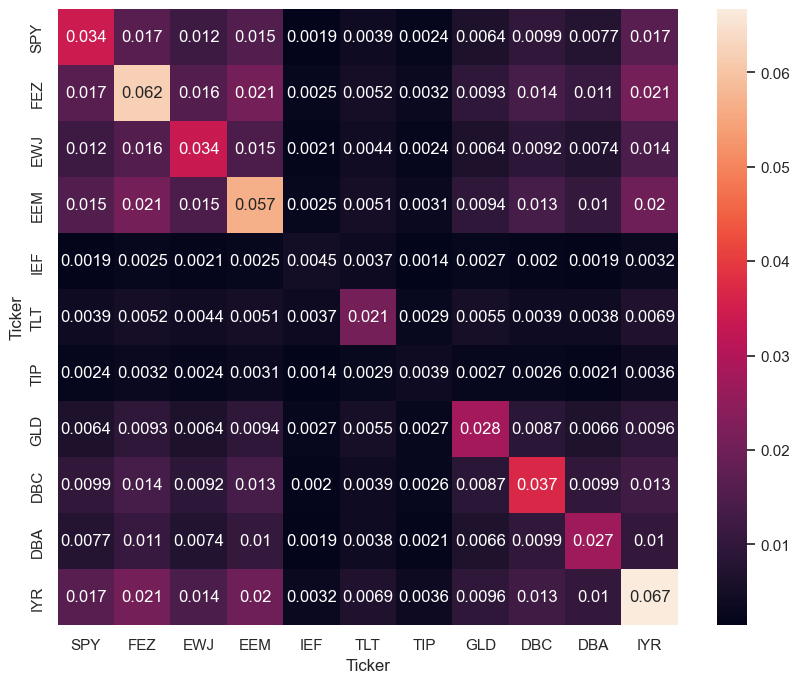

In [26]:
# 수축된 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(cov_mat_hat, annot=True)


<Axes: xlabel='Ticker', ylabel='Ticker'>

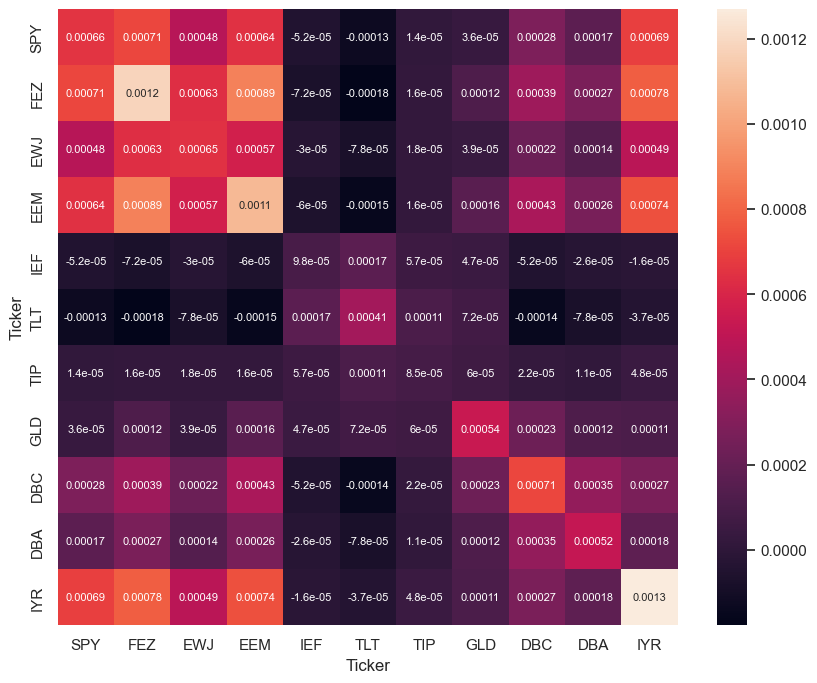

In [27]:
# 수축된 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(lw_cov_mat, annot=True, annot_kws={"size": 8})

### 4. 계층적 리스크 패리티 포트폴리오

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

C:\Users\USER\AppData\Local\Temp\ipykernel_24232\304218757.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, 'ward')   # 'ward'방식은 클러스터 내 분산을 최소화하는 방식


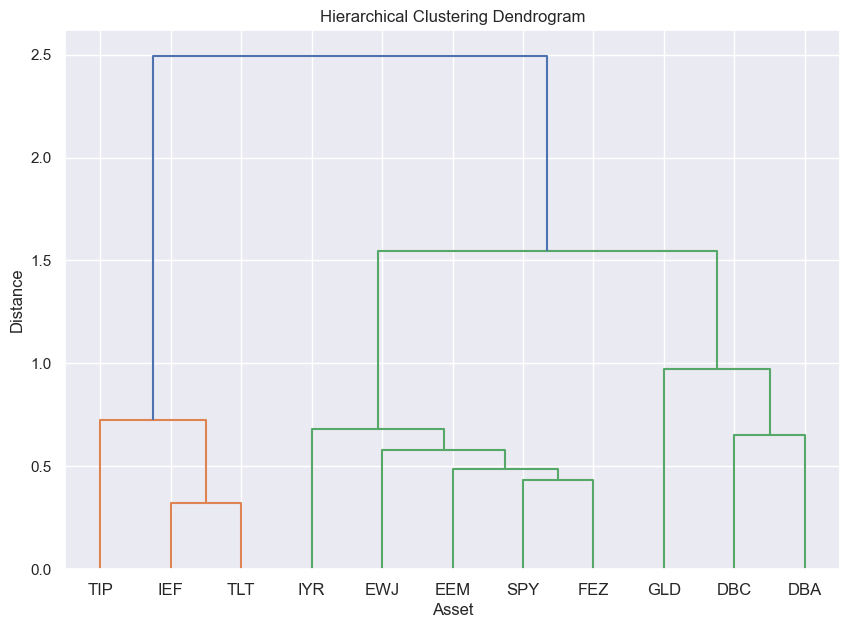

In [30]:
# 상관관계 행렬을 거리 행렬로 변환
# 상관관계 값이 1인 경우(완벽한 정상관) 거리는 0이 됨, -1인 경우(완벽한 역상관) 거리는 최대값인 1이 됨
# 상관관계값 -1 ~ 1 값을 거리값 0 ~ 1 값으로 스케일링
dist_matrix = np.sqrt((1 - corr_mat) / 2)
# → 상관계수를 거리로 변환한 값 (1이면 완전 반대, 0이면 완전 동일)

# 거리행렬을 기반으로 각 자산들 사이의 계층적 클러스터링 수행
linkage_matrix = linkage(dist_matrix, 'ward')   # 'ward'방식은 클러스터 내 분산을 최소화하는 방식
# y축: "거리(Distance)" → 자산 간 비슷함 정도를 나타냄 (낮을수록 유사)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=rets.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Asset')
plt.ylabel('Distance')
plt.show()

* 상기 다이어그램 해석
  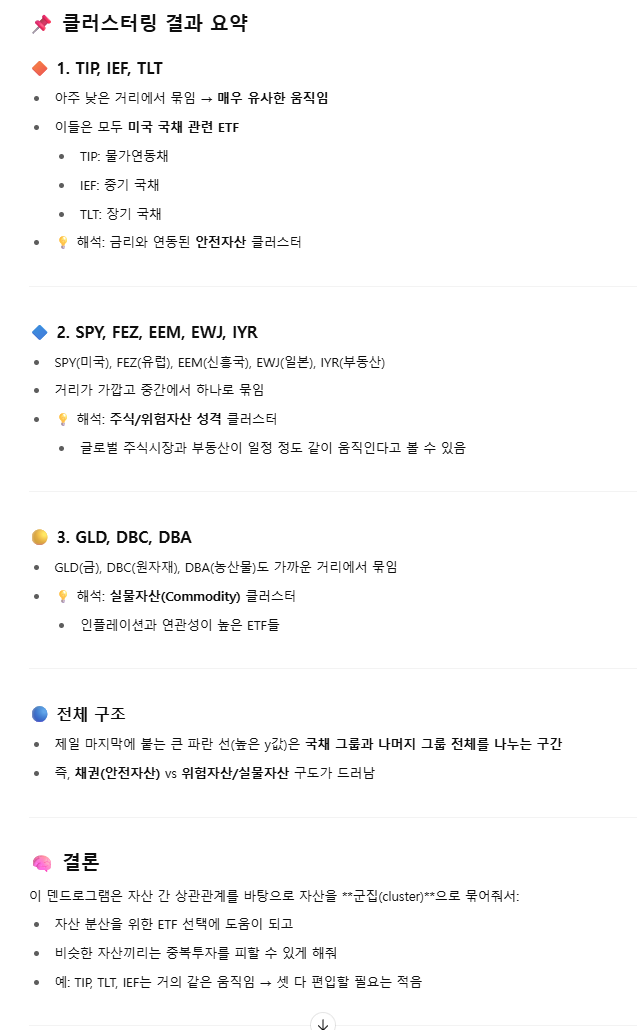

In [32]:
dist_matrix

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Ticker,,,,,,,,,,,
SPY,0.000000,0.299125,0.355751,0.334025,0.781979,0.791904,0.683700,0.684718,0.539398,0.594116,0.341367
FEZ,0.299125,0.000000,0.362511,0.322014,0.783416,0.793878,0.687059,0.652008,0.531589,0.568885,0.421449
EWJ,0.355751,0.362511,0.000000,0.391379,0.751789,0.759842,0.676106,0.683053,0.576762,0.612194,0.476489
EEM,0.334025,0.322014,0.391379,0.000000,0.774274,0.784031,0.686739,0.626935,0.501573,0.566893,0.425580
IEF,0.781979,0.783416,0.751789,0.774274,0.000000,0.220653,0.369869,0.622902,0.778975,0.748996,0.724158
TLT,0.791904,0.793878,0.759842,0.784031,0.220653,0.000000,0.430313,0.648986,0.798331,0.765780,0.725562
TIP,0.683700,0.687059,0.676106,0.686739,0.369869,0.430313,0.000000,0.588968,0.671785,0.685982,0.648230
GLD,0.684718,0.652008,0.683053,0.626935,0.622902,0.648986,0.588968,0.000000,0.559456,0.622116,0.657736
DBC,0.539398,0.531589,0.576762,0.501573,0.778975,0.798331,0.671785,0.559456,0.000000,0.451185,0.595873


In [33]:
linkage_matrix

array([[ 4.        ,  5.        ,  0.32052431,  2.        ],
       [ 0.        ,  1.        ,  0.43282755,  2.        ],
       [ 3.        , 12.        ,  0.48660067,  3.        ],
       [ 2.        , 13.        ,  0.58073106,  4.        ],
       [ 8.        ,  9.        ,  0.65110349,  2.        ],
       [10.        , 14.        ,  0.68251269,  5.        ],
       [ 6.        , 11.        ,  0.72345078,  3.        ],
       [ 7.        , 15.        ,  0.97050141,  3.        ],
       [16.        , 18.        ,  1.54486224,  8.        ],
       [17.        , 19.        ,  2.49368464, 11.        ]])

* 쳇GPT 활용 HRP 클래스 구현

In [35]:
from scipy.cluster.hierarchy import leaves_list

In [36]:
class HRP:
    def __init__(self, cov_matrix, linkage_matrix):
        self.cov_matrix = cov_matrix
        self.linkage_matrix = linkage_matrix
        self.weights = None

    # 유사한 자산끼리 공분산 행렬 위치 재정렬
    def quasi_diagonalization(self):
        # 클러스터 트리의 리프 노드 순서에 따라 자산들을 재배열하고 가중치 할당(공분산 행렬을 재배열)
        leaf_order = leaves_list(self.linkage_matrix) # leaves_list() → 덴드로그램(계층 트리)의 리프 노드 순서 반환
        # print(leaf_order)
        ordered_cov_matrix = self.cov_matrix.iloc[leaf_order, leaf_order] # leaf_order 순서대로 cov_matrix를 재배열해서
                                                                          # 비슷한 자산끼리 옆에 위치하도록 정렬함
        return ordered_cov_matrix, leaf_order
                    # 🔢 예제: 자산 3개 (A, B, C)
                    # 1. 공분산 행렬 (기본 순서: A, B, C)
                            # cov_matrix = pd.DataFrame([
                            #     [0.04, 0.01, 0.005],
                            #     [0.01, 0.09, 0.002],
                            #     [0.005, 0.002, 0.06]
                            # ], columns=["A", "B", "C"], index=["A", "B", "C"])
                    # 2. 계층적 클러스터링 결과 (예시)
                            # leaf_order = [2, 0, 1]  # 즉, 순서가 C → A → B
                            # 이건 계층적 클러스터링에서 C와 A가 더 유사하고, B는 좀 떨어진다는 의미야.
                    # 3. 행렬 재정렬
                            # ordered_cov_matrix = cov_matrix.iloc[leaf_order, leaf_order]
                            # =>
                            #              C        A        B
                            # C        0.060   0.005   0.002
                            # A        0.005   0.040   0.010
                            # B        0.002   0.010   0.090

    ### 단순히 자산 수로 균등하게 분할
    # 자산들을 두 그룹으로 계속 나누면서 위험 균형(리스크 균형)을 잡아가는 방식
    # def recursive_bisection(self, ordered_cov_matrix):
    #     if ordered_cov_matrix.shape[0] == 1:
    #         return np.array([1])
    #     weights = np.ones(ordered_cov_matrix.shape[0]) / ordered_cov_matrix.shape[0]  # 일단 가중치 1을 각 자산수만큼 쪼갬
    #     half_point = len(ordered_cov_matrix) // 2
    #     weights[:half_point] *= self.recursive_bisection(ordered_cov_matrix.iloc[:half_point, :half_point])
    #     weights[half_point:] *= self.recursive_bisection(ordered_cov_matrix.iloc[half_point:, half_point:])
    #     weights /= weights.sum()
    #     return weights

    ### 리스크가 더 적은 쪽에는 더 많은 비중을 부여
    # 위험을 반씩 나누는 게 아니라, 비중을 조절해서 리스크를 균형 맞춤
    def recursive_bisection(self, ordered_cov_matrix):
        n = ordered_cov_matrix.shape[0]
    
        if n == 1:
            return np.array([1.])
    
        # 클러스터를 반으로 나눔
        half = n // 2
        left_cov = ordered_cov_matrix.iloc[:half, :half]
        right_cov = ordered_cov_matrix.iloc[half:, half:]
    
        # 리스크 계산: 각 클러스터의 전체 variance
        # **클러스터(자산 묶음)의 전체 위험(분산)**을 계산하는 함수
        # "여러 자산을 동일한 비중으로 묶었을 때, 전체 클러스터의 리스크(변동성 제곱)는 얼마나 되는가?"
        def get_cluster_variance(cov):
            w = np.ones(cov.shape[0]) / cov.shape[0]
            # 자산 수만큼 1로 채운 배열을 만들고
            # 이를 자산 수로 나눔 → 동일 가중치(equal weight) 포트폴리오
                        # 🔢 간단한 숫자 예
                        # 자산 2개 (A, B)
                        # 공분산 행렬:
                        # cov = np.array([
                        #     [0.04, 0.01],
                        #     [0.01, 0.09]
                        # ])
                        # 동일 가중치 벡터:
                        # w = [0.5, 0.5]
                        # 중간 계산:
                        # Σw = [0.5*0.04 + 0.5*0.01, 0.5*0.01 + 0.5*0.09] = [0.025, 0.05]
                        # 최종 계산:
                        # variance = 0.5 * 0.025 + 0.5 * 0.05 = 0.0375
                        # 숫자 0.0375는 **포트폴리오 수익률이 얼마나 흔들리는지의 크기(제곱)**을 말해
                        # 둘을 동일한 50% 비중으로 포트폴리오 구성했을 때,
                        # 분산 = 0.0375 → 표준편차 = √0.0375 ≈ 0.1936 (약 19.4%)
                        # "자산 A와 B를 동일 비중으로 섞었을 때, 전체 포트폴리오의 변동성은 약 19.4%다"
                        # 🧠 직관적 비유
                        # 🎒 “두 개의 물건(A, B)이 들어 있는 가방의 흔들림 정도가 0.0375(제곱 기준)”
                        # → 흔들림이 크면 위험한 물건, 작으면 안전한 물건
                        # → HRP는 흔들림 적은 가방 쪽에 더 많은 돈을 넣는 전략이야

            return float(w @ cov.values @ w.T)

        # 왼쪽과 오른쪽 **클러스터의 리스크(=분산)**를 각각 계산
        var_left = get_cluster_variance(left_cov)
        var_right = get_cluster_variance(right_cov)

        ### HRP에서 가장 핵심적인 "위험 역비례 비중 배분" 로직
        # 각 그룹에 할당할 비중 비율 (risk inverse 비율)
        alloc_left = var_right / (var_left + var_right)
        alloc_right = var_left / (var_left + var_right)
                        ###  예시: 두 클러스터의 리스크
                        # 왼쪽 클러스터 (A, B) 의 variance = var_left = 0.01
                        # 오른쪽 클러스터 (C, D) 의 variance = var_right = 0.04
                        # alloc_left  = 0.04 / (0.01 + 0.04) = 0.8
                        # alloc_right = 0.01 / (0.01 + 0.04) = 0.2
                        # 왼쪽이 덜 위험하니까 → 자금 80% 배정
                        # 오른쪽이 더 위험하니까 → 자금 20%만 배정
    
        # 재귀적으로 하위 클러스터 비중 계산
        ### 앞에서 클러스터를 둘로 나눈 후, 그 하위 클러스터들에 대해 다시 같은 작업을 반복
        weights_left = self.recursive_bisection(left_cov)
        weights_right = self.recursive_bisection(right_cov)
    
        # 클러스터별 비중을 전체 비중에 곱함
        weights = np.concatenate([
            weights_left * alloc_left,
            weights_right * alloc_right
        ])
    
        return weights

    def allocate(self):
        ordered_cov_matrix, leaf_order = self.quasi_diagonalization()
        allocation = self.recursive_bisection(ordered_cov_matrix)
        # 원래 자산 순서에 따라 가중치를 재정렬합니다
        original_order = np.argsort(leaf_order)    # 자산 원래 순서로 복구하기 위한 인덱스
        self.weights = pd.Series(allocation[original_order], index=self.cov_matrix.columns)
        return self.weights

In [37]:
order = leaves_list(linkage_matrix)
order

array([ 6,  4,  5, 10,  2,  3,  0,  1,  7,  8,  9], dtype=int32)

In [38]:
ordered = cov_mat_hat.iloc[order,order]
ordered

Ticker,TIP,IEF,TLT,IYR,EWJ,EEM,SPY,FEZ,GLD,DBC,DBA
Ticker,,,,,,,,,,,
TIP,0.003880,0.001427,0.002899,0.003647,0.002420,0.003059,0.002392,0.003195,0.002661,0.002571,0.002118
IEF,0.001427,0.004538,0.003669,0.003219,0.002083,0.002487,0.001870,0.002505,0.002693,0.001974,0.001890
TLT,0.002899,0.003669,0.021053,0.006904,0.004358,0.005147,0.003860,0.005157,0.005480,0.003910,0.003828
IYR,0.003647,0.003219,0.006904,0.066679,0.014387,0.019825,0.016611,0.020816,0.009555,0.012573,0.010157
EWJ,0.002420,0.002083,0.004358,0.014387,0.033584,0.014558,0.011653,0.015617,0.006366,0.009239,0.007389
EEM,0.003059,0.002487,0.005147,0.019825,0.014558,0.056709,0.015406,0.020950,0.009441,0.013493,0.010439
SPY,0.002392,0.001870,0.003860,0.016611,0.011653,0.015406,0.034121,0.016512,0.006389,0.009906,0.007713
FEZ,0.003195,0.002505,0.005157,0.020816,0.015617,0.020950,0.016512,0.061982,0.009337,0.013512,0.010876
GLD,0.002661,0.002693,0.005480,0.009555,0.006366,0.009441,0.006389,0.009337,0.027834,0.008664,0.006592


In [39]:
cov_matrix = lw_cov_mat  
hrp = HRP(cov_matrix, linkage_matrix)
portfolio_weights = hrp.allocate()
print(portfolio_weights.values)

[0.03050326 0.0169308  0.03101369 0.03575338 0.27634177 0.08261421
 0.31664    0.09236489 0.04324308 0.05882957 0.01576533]


In [40]:
cov_matrix

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Ticker,,,,,,,,,,,
SPY,0.000655,0.000712,0.000477,0.000645,-0.000052,-0.000129,0.000014,0.000036,0.000281,0.000169,0.000690
FEZ,0.000712,0.001181,0.000634,0.000886,-0.000072,-0.000177,0.000016,0.000117,0.000393,0.000273,0.000782
EWJ,0.000477,0.000634,0.000645,0.000571,-0.000030,-0.000078,0.000018,0.000039,0.000223,0.000142,0.000487
EEM,0.000645,0.000886,0.000571,0.001081,-0.000060,-0.000150,0.000016,0.000160,0.000430,0.000264,0.000740
IEF,-0.000052,-0.000072,-0.000030,-0.000060,0.000098,0.000166,0.000057,0.000047,-0.000052,-0.000026,-0.000016
TLT,-0.000129,-0.000177,-0.000078,-0.000150,0.000166,0.000409,0.000107,0.000072,-0.000145,-0.000078,-0.000037
TIP,0.000014,0.000016,0.000018,0.000016,0.000057,0.000107,0.000085,0.000060,0.000022,0.000011,0.000048
GLD,0.000036,0.000117,0.000039,0.000160,0.000047,0.000072,0.000060,0.000537,0.000227,0.000117,0.000109
DBC,0.000281,0.000393,0.000223,0.000430,-0.000052,-0.000145,0.000022,0.000227,0.000711,0.000354,0.000272


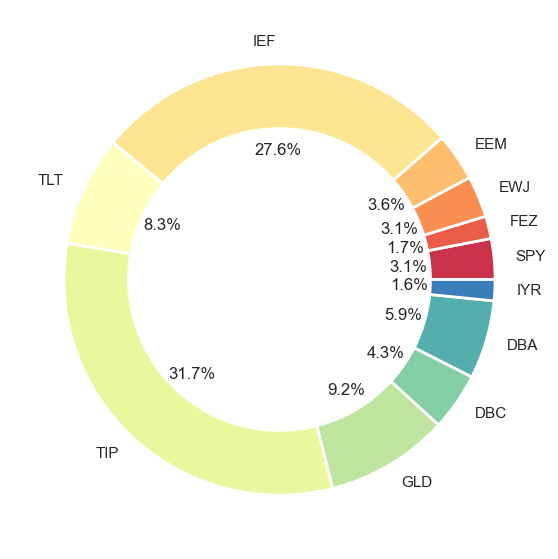

In [41]:
# RP 가중치 데이터프레임 생성
weights_df = pd.Series(np.round(portfolio_weights, 4), index=tickers)
# weights_df = weights_df[weights_df > 0.0]

# 색깔 팔레트
pal = sns.color_palette('Spectral', len(tickers))

# 파이차트 시각화
plt.figure(figsize=(7,7))
wedgeprops = {'width':0.3, 'edgecolor':'w', 'linewidth':2}
plt.pie(weights_df, labels=weights_df.index, autopct='%.1f%%', wedgeprops=wedgeprops, colors=pal)
plt.show()

In [42]:
# 빈 데이터프레임 생성
hrp_w_df = pd.DataFrame().reindex_like(rets)
# hrp_w_df = pd.DataFrame(index=rets.index, columns=rets.columns, dtype=float)

# Ledoit-Wolf 수축 공분산 리스트 생성
lw_cov_list = []
for i in range(52, len(rets)):
    window_data = rets.iloc[i-52:i]
    lw = LedoitWolf()
    lw.fit(window_data)
    lw_cov_mat = pd.DataFrame(lw.covariance_, index=rets.columns, columns=rets.columns)
    lw_cov_list.append(lw_cov_mat)

# HRP 포트폴리오 가중치 계산
for j, i in enumerate(range(52, len(hrp_w_df))):
    cov_matrix = lw_cov_list[j]  # 수축된 공분산 행렬 사용

    # 상관 행렬로 변환
    std_dev = np.sqrt(np.diag(cov_matrix))
    corr_matrix = cov_matrix / np.outer(std_dev, std_dev)
    corr_matrix = pd.DataFrame(corr_matrix, index=cov_matrix.index, columns=cov_matrix.columns)

    # 👇 안정화 추가
    np.fill_diagonal(corr_matrix.values, 1.0)
    corr_matrix = corr_matrix.clip(-1 + 1e-6, 1 - 1e-6)

    # 거리 행렬 및 linkage matrix
    dist_matrix = np.sqrt((1 - corr_matrix) / 2)
    linkage_matrix = linkage(dist_matrix, method='ward')

    # HRP 가중치 계산
    hrp = HRP(cov_matrix, linkage_matrix)
    weights = hrp.allocate()

    # 결과 저장
    hrp_w_df.iloc[i] = weights

In [43]:
hrp_w_df

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2007-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,0.067432,0.025511,0.021948,0.054130,0.207134,0.092031,0.232272,0.067672,0.063168,0.105248,0.063454
2025-07-13,0.067932,0.026036,0.022234,0.054644,0.205627,0.092839,0.227803,0.069580,0.064595,0.106181,0.062530
2025-07-20,0.066974,0.025667,0.021605,0.053820,0.203642,0.091739,0.232649,0.068197,0.063881,0.104322,0.067505


In [44]:
### 단순 분할 방식

class HRP2:
    def __init__(self, cov_matrix, linkage_matrix):
        self.cov_matrix = cov_matrix
        self.linkage_matrix = linkage_matrix
        self.weights = None

    def quasi_diagonalization(self):
        # 클러스터 트리의 리프 노드 순서에 따라 자산들을 재배열
        leaf_order = leaves_list(self.linkage_matrix)
        ordered_cov_matrix = self.cov_matrix.iloc[leaf_order, leaf_order]
        return ordered_cov_matrix, leaf_order

    def recursive_bisection(self, ordered_cov_matrix, weights=None):
        if weights is None:
            weights = np.ones(ordered_cov_matrix.shape[0])
        
        # 자산이 하나만 있을 때, 가중치는 그대로 1을 반환
        if ordered_cov_matrix.shape[0] == 1:
            return weights
        
        half_point = len(ordered_cov_matrix) // 2
        
        # 왼쪽 하위 트리에 대한 가중치 재귀적 할당
        left_weights = self.recursive_bisection(ordered_cov_matrix.iloc[:half_point, :half_point], weights[:half_point])
        # 오른쪽 하위 트리에 대한 가중치 재귀적 할당
        right_weights = self.recursive_bisection(ordered_cov_matrix.iloc[half_point:, half_point:], weights[half_point:])
        
        # 왼쪽과 오른쪽 가중치를 병합
        weights[:half_point] = left_weights
        weights[half_point:] = right_weights
        
        # 가중치 정규화
        weights /= weights.sum()
        
        return weights

    def allocate(self):
        ordered_cov_matrix, leaf_order = self.quasi_diagonalization()
        allocation = self.recursive_bisection(ordered_cov_matrix)
        original_order = np.argsort(leaf_order)
        self.weights = pd.Series(allocation[original_order], index=self.cov_matrix.columns)
        return self.weights



In [45]:
cov_matrix = lw_cov_mat  
hrp = HRP2(cov_matrix, linkage_matrix)
portfolio_weights = hrp.allocate()
print(portfolio_weights)

Ticker
SPY    0.1250
FEZ    0.0625
EWJ    0.1250
EEM    0.0625
IEF    0.1250
TLT    0.1250
TIP    0.1250
GLD    0.0625
DBC    0.0625
DBA    0.0625
IYR    0.0625
dtype: float64


* 강의 내용을 기반으로 SRP 클래스 구현

In [47]:
# 리스크 패리티 포트폴리오 가중치 계산 함수
def get_rp_weights(cov):

    # 자산 개수
    noa = cov.shape[0]

    # 초기 가중치값
    init_guess = np.repeat(1/noa, noa)

    # 제약조건 및 상하한값
    bounds=((0.0, 1.0), ) * noa
    weights_sum_to_1 = {'type':'eq',
                        'fun': lambda weights: np.sum(weights) - 1}

    # 자산별 최적화의 목표 정의 (1/N)
    target_risk = np.repeat(1/noa, noa)

    # 목적함수: 타겟 위험 예산과 자산별 위험 기여도 간의 괴리
    def msd_risk(weights, target_risk, cov):
        port_var = weights.T @ cov @ weights
        marginal_contribs = cov @ weights

        risk_contribs = np.multiply(marginal_contribs, weights.T) / port_var

        return ((risk_contribs - target_risk) ** 2).sum()

    # 최적화 수행
    res = minimize(msd_risk,                       # 'fun' : 최소화하고자 하는 목적 함수
                   init_guess,                     # 'x0' :  최적화 시작 시 초기 추정값
                   args=(target_risk, cov),        # 'args' : 목적함수에 추가적으로 전달되어야 하는 인자들
                   method='SLSQP',                 # 'method' : 사용할 최적화 알고리즘, 'SLSQP'는 순차적 최소 제곱 프로그래밍 의미
                   constraints=(weights_sum_to_1), # 'constraints' : 제약조건, 여기서는 가중치의 합이 1이 되어야 함
                   bounds=bounds)                  # 'bounds' : 변수에 적용할 상하한 제약조건
    
    return res.x

In [48]:
srp_weights = get_rp_weights(cov_matrix)
srp_weights

array([0.05788068, 0.05338306, 0.04655795, 0.05671714, 0.16357007,
       0.11120186, 0.16416499, 0.09654332, 0.09747948, 0.09381726,
       0.05868419])

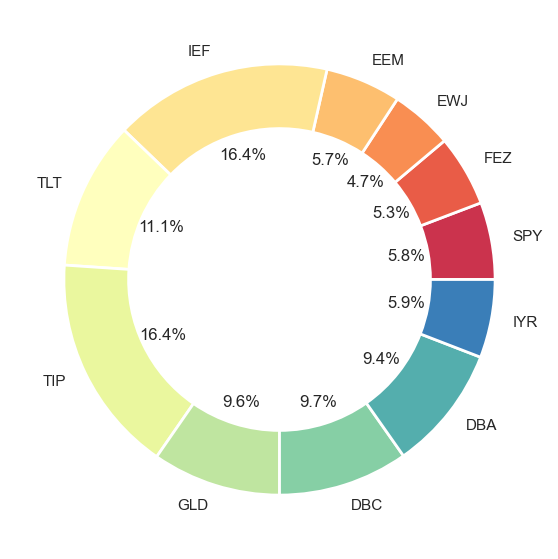

In [49]:
# SRP 가중치 데이터프레임 생성
weights_df = pd.Series(np.round(srp_weights, 4), index=tickers)
weights_df = weights_df[weights_df > 0.0]

# 파이차트 시각화
plt.figure(figsize=(7,7))
wedgeprops = {'width':0.3, 'edgecolor':'w', 'linewidth':2}
plt.pie(weights_df, labels=weights_df.index, autopct='%.1f%%', wedgeprops=wedgeprops, colors=pal)
plt.show()

In [50]:
# 빈 데이터프레임 생성
srp_w_df = pd.DataFrame().reindex_like(rets)

# 공분산행렬의 3차원 배열 생성
cov = rets.rolling(52).cov().fillna(0) * 52
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

# RP 가중치 산출
for i in range(52, len(srp_w_df)):
    srp_w_df.iloc[i] = get_rp_weights(cov[i-1])

In [51]:
srp_w_df

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2007-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,0.052596,0.045599,0.042442,0.048624,0.189723,0.093671,0.208401,0.090543,0.089656,0.085207,0.053538
2025-07-13,0.051993,0.045606,0.042335,0.048185,0.192258,0.093452,0.207718,0.091236,0.090699,0.085600,0.050918
2025-07-20,0.051795,0.045759,0.041994,0.048378,0.192381,0.093295,0.207924,0.091574,0.088737,0.085441,0.052724


### 리스크패리티 두 개의 방법론 차이 비교
  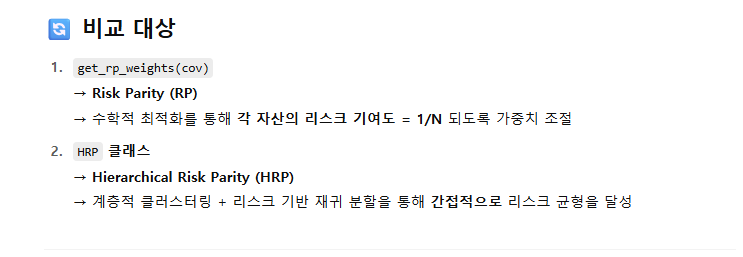
  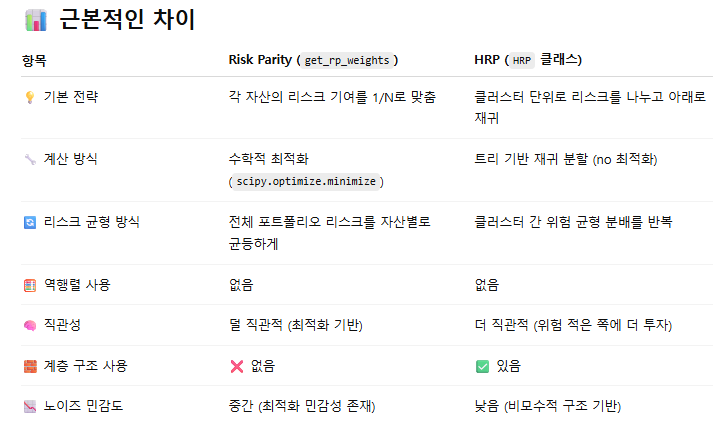
  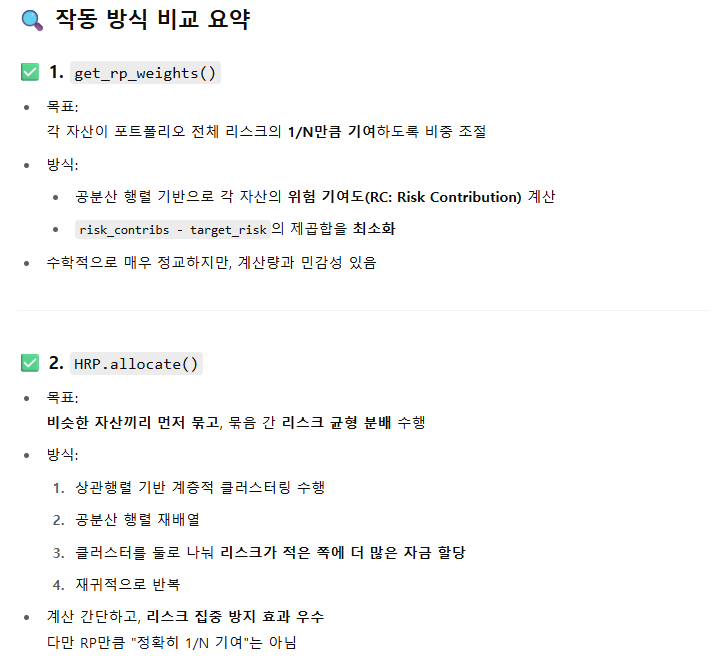
  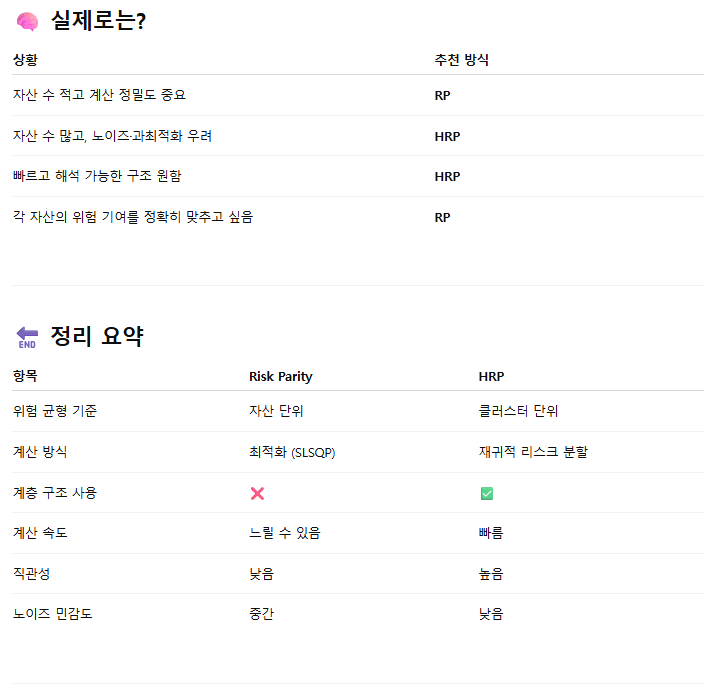

#### 백테스트 및 시각화

* HRP

Text(0, 0.5, 'Returns')

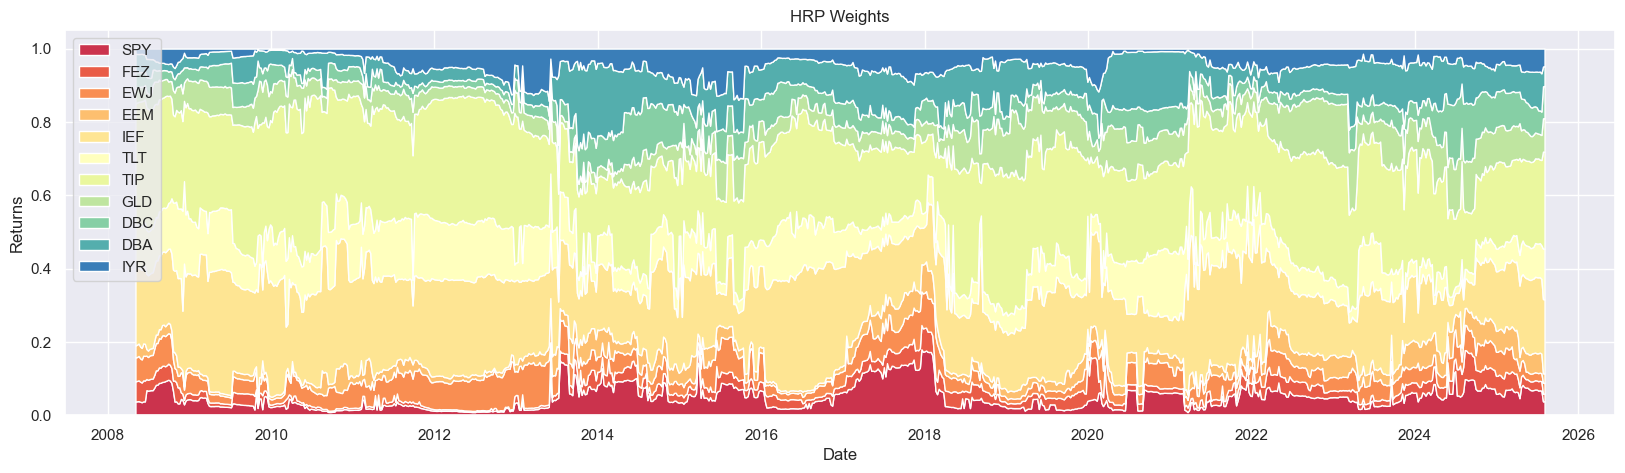

In [55]:
# 시계열 플랏 시각화
plt.figure(figsize=(20, 5))
plt.stackplot(hrp_w_df.index, hrp_w_df.T, labels=hrp_w_df.columns, colors=pal)
plt.legend(loc='upper left')
plt.title('HRP Weights')
plt.xlabel('Date')
plt.ylabel('Returns')

Text(0, 0.5, 'Returns')

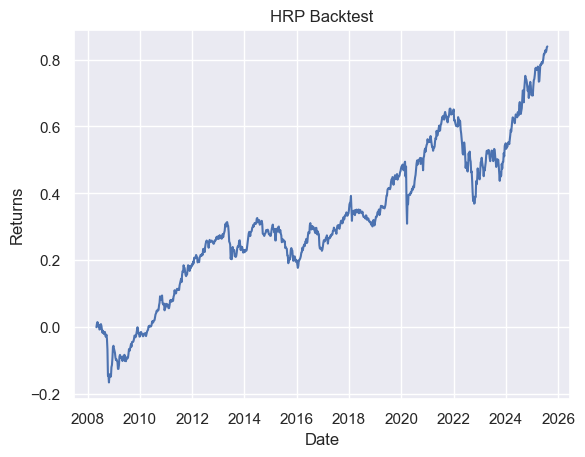

In [56]:
# HRP 포트폴리오 수익률
port_rets_h = hrp_w_df.shift() * rets
port_cum_rets_h = (1 + port_rets_h.sum(axis=1)).cumprod() - 1

# 백테스팅 시각화
plt.plot(port_cum_rets_h.iloc[52:])
plt.title('HRP Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')

* SRP

Text(0, 0.5, 'Returns')

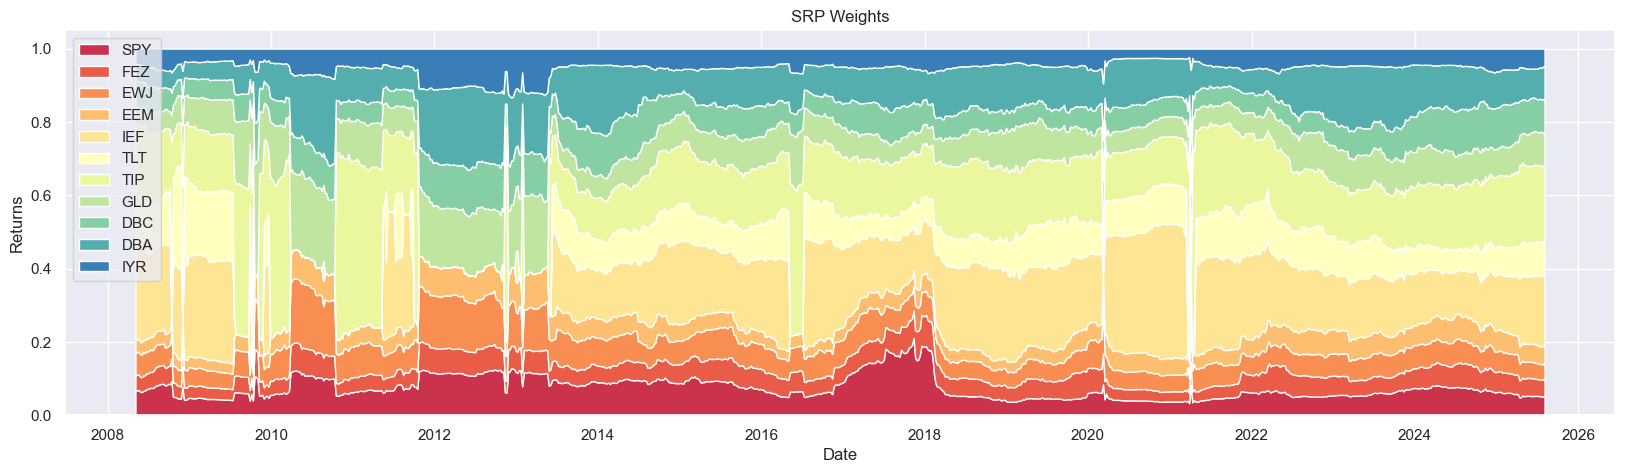

In [58]:
# 시계열 플랏 시각화
plt.figure(figsize=(20, 5))
plt.stackplot(srp_w_df.index, srp_w_df.T, labels=srp_w_df.columns, colors=pal)
plt.legend(loc='upper left')
plt.title('SRP Weights')
plt.xlabel('Date')
plt.ylabel('Returns')

Text(0, 0.5, 'Returns')

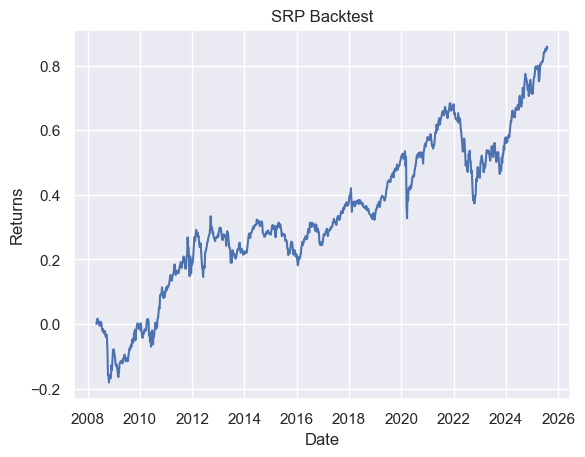

In [59]:
# SRP 포트폴리오 수익률
port_rets_s = srp_w_df.shift() * rets
port_cum_rets_s = (1 + port_rets_s.sum(axis=1)).cumprod() - 1

# 백테스팅 시각화
plt.plot(port_cum_rets_s.iloc[52:])
plt.title('SRP Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')

#### 포트폴리오 백테스팅 엔진

In [61]:
### 포트폴리오 백테스팅 엔진 클래스
# Shrinkage 방법을 적용한 공분산 행렬 계산 함수
def covMatShrinkage(cov_mat, vols, const_corr, phi):

    # 자산 개수
    N = cov_mat.shape[0]

    # 고정 상관계수(모든 요소의 평균 상관 값)로 상관계수 행렬 생성
    const_corr_mat = np.full((N, N), const_corr)
    np.fill_diagonal(const_corr_mat, 1.0)
    
    # 각 자산의 변동성만을 나타내는 대각 행렬 생성(각 자산의 독립적인 위험 기여도를 명확하게 파악 가능)
    vols_mat = np.diag(vols)
    
    # 상관계수 행렬을 공분산 행렬로 변환(각 자산의 변동성을 고려한 가중 상관관계 행렬 생성)
    const_cov_mat = vols_mat.T @ const_corr_mat @ vols_mat
    # print(const_cov_mat)
    
    # 두 공분산 행렬을 블렌딩(phi는 0과 1사이의 값으로 phi가 0에 가까우면 원래 공분산 행렬의 영향을 더 크게 함)
    # 원래 공분산 행렬의 노이즈를 줄이고 과적합 방지를 위함
    cov_mat_hat = (1 - phi) * cov_mat + phi * const_cov_mat

    # 업데이트된 공분산 행렬 반환
    return cov_mat_hat


class PortOptimPy:
    # 초기화 함수
    def __init__(self, price, param=52):

        # 연율화 패러미터
        self.param = param

        # 주간 수익률
        self.rets = price.pct_change().dropna()

        # 기대수익률
        self.er = np.array(self.rets * self.param)

        # 변동성
        self.vol = np.array(self.rets.rolling(self.param).std() * np.sqrt(self.param))
        self.vol2 = rets.rolling(self.param).std().fillna(0) * np.sqrt(self.param)

        # 공분산행렬
        cov = self.rets.rolling(self.param).cov().fillna(0) * self.param
        self.cov = cov.values.reshape(int(cov.shape[0]/cov.shape[1]), cov.shape[1], cov.shape[1])

        # 거래비용
        self.cost = 0.0005
        # 가중치
        self.phi = 0.7
        
    # 횡적 배분 모델 클래스
    class CrossSectional:
        
        # 축소 리스크 패리티 함수 (srp)
        def srp(self, cov_mat):
            # 자산 개수
            noa = cov_mat.shape[0]

            # 초기 가중치값
            init_guess = np.repeat(1/noa, noa)

            # 제약조건 및 상하한값
            bounds=((0.0, 1.0), ) * noa
            weights_sum_to_1 = {'type':'eq','fun': lambda weights: np.sum(weights) - 1}

            # 자산별 최적화의 목표 정의 (1/N)
            target_risk = np.repeat(1/noa, noa)

            # 동등 위험 기여 함수 : 타겟 위험 예산과 자산별 위험 기여도 간의 괴리
            def msd_risk(weights, target_risk, cov_mat):
                port_var = weights.T @ cov_mat @ weights
                marginal_contribs = cov_mat @ weights

                risk_contribs = np.multiply(marginal_contribs, weights.T) / port_var

                return ((risk_contribs - target_risk) ** 2).sum()

            # 리스크 패리티 가중치 계산 최적화 수행
            res = minimize(msd_risk,                       # 'fun' : 최소화하고자 하는 목적 함수
                           init_guess,                     # 'x0' :  최적화 시작 시 초기 추정값
                           args=(target_risk, cov_mat),    # 'args' : 목적함수에 추가적으로 전달되어야 하는 인자들
                           method='SLSQP',                 # 'method' : 사용할 최적화 알고리즘, 'SLSQP'는 순차적 최소 제곱 프로그래밍 의미
                           constraints=(weights_sum_to_1), # 'constraints' : 제약조건, 여기서는 가중치의 합이 1이 되어야 함
                           bounds=bounds)                  # 'bounds' : 변수에 적용할 상하한 제약조건
    
            # 계산된 가중치 반환
            return res.x

        # 계층적 리스크 패리티 함수 (hrp)
        def hrp(self, cov_mat, rets): 
            corr_mat = rets.corr()
            cov_mat = pd.DataFrame(cov_mat)
            noa = cov_mat.shape[0]
            dist_matrix = np.sqrt((1 - corr_mat) / 2)
            linkage_matrix = linkage(dist_matrix, 'ward')  
            leaf_order = leaves_list(linkage_matrix)
            ordered_cov_matrix = cov_mat.iloc[leaf_order, leaf_order]
            
            # 최적 포트폴리오 가중치 추정 함수
            def recursive_bisection(ordered_cov_matrix, weights=None):
                n = ordered_cov_matrix.shape[0]
                if n == 1:
                    return np.array([1.])
                    
                # 클러스터를 반으로 나눔
                half = n // 2
                left_cov = ordered_cov_matrix.iloc[:half, :half]
                right_cov = ordered_cov_matrix.iloc[half:, half:]
        
                def get_cluster_variance(cov):
                    w = np.ones(cov.shape[0]) / cov.shape[0]
                    # 자산 수만큼 1로 채운 배열을 만들고
                    # 이를 자산 수로 나눔 → 동일 가중치(equal weight) 포트폴리오
        
                    return float(w @ cov.values @ w.T)
        
                # 왼쪽과 오른쪽 **클러스터의 리스크(=분산)**를 각각 계산
                var_left = get_cluster_variance(left_cov)
                var_right = get_cluster_variance(right_cov)

                ### HRP에서 가장 핵심적인 "위험 역비례 비중 배분" 로직
                # 각 그룹에 할당할 비중 비율 (risk inverse 비율)
                alloc_left = var_right / (var_left + var_right)
                alloc_right = var_left / (var_left + var_right)

                # 재귀적으로 하위 클러스터 비중 계산
                ### 앞에서 클러스터를 둘로 나눈 후, 그 하위 클러스터들에 대해 다시 같은 작업을 반복
                weights_left = recursive_bisection(left_cov)
                weights_right = recursive_bisection(right_cov)
            
                # 클러스터별 비중을 전체 비중에 곱함
                weights = np.concatenate([
                    weights_left * alloc_left,
                    weights_right * alloc_right
                ])
            
                return weights


            allocation = recursive_bisection(ordered_cov_matrix)
            original_order = np.argsort(leaf_order)
            weights = pd.Series(allocation[original_order], index=cov_mat.columns)

            # 계산된 가중치 반환
            return weights  

        
    # 거래비용 함수
    def transaction_cost(self, weights_df, rets_df, cost=0.0005):
        # 이전 기의 투자 가중치
        prev_weights_df = (weights_df.shift(1).fillna(0) * (1 + rets_df.iloc[self.param-1:,:])) \
        .div((weights_df.shift(1).fillna(0) * (1 + rets_df.iloc[self.param-1:,:])).sum(axis=1), axis=0)

        # 거래비용 데이터프레임
        cost_df = abs(weights_df - prev_weights_df) * cost
        cost_df.fillna(0, inplace=True)

        return cost_df
 
    # 백테스팅 실행 함수
    def run(self, cs_model, cost):
        # 주간 수익률 데이터프레임
        rets = self.rets
        
        # 빈 딕셔너리
        backtest_dict = {}
        weights_df = pd.DataFrame().reindex_like(rets)
        
        # 횡적 배분 모델 선택 및 실행 
        if cs_model == 'srp':
            for i in range(self.param, len(weights_df)):
                const_corr = (self.cov[i-1].sum().sum() - len(self.cov[i-1])) / (len(self.cov[i-1]) ** 2 - len(self.cov[i-1]))
                cov_mat = covMatShrinkage(self.cov[i-1], self.vol2.iloc[i-1], const_corr, phi)           
                weights_df.iloc[i] = self.CrossSectional().srp(cov_mat)
            
        elif cs_model == 'hrp':
            for i in range(self.param, len(weights_df)):
                const_corr = (self.cov[i-1].sum().sum() - len(self.cov[i-1])) / (len(self.cov[i-1]) ** 2 - len(self.cov[i-1]))
                cov_mat = covMatShrinkage(self.cov[i-1], self.vol2.iloc[i-1], const_corr, phi)           
                weights_df.iloc[i] = self.CrossSectional().hrp(cov_mat, self.rets)


        # 횡적 배분 모델 자산 수익률
        cs_rets = weights_df.shift() * rets

        # 횡적 배분 모델 포트폴리오 수익률
        cs_cum_rets = (1 + cs_rets.sum(axis=1)).cumprod() - 1

        # 거래비용 데이터프레임
        cost = self.transaction_cost(weights_df, rets)

        # 최종 포트폴리오 자산별 수익률
        port_asset_rets = cs_rets - cost

        # 최종 포트폴리오 수익률
        port_rets = port_asset_rets.sum(axis=1)
        port_cum_rets = (1 + port_asset_rets.sum(axis=1)).cumprod() - 1
        port_rets.index = pd.to_datetime(port_rets.index).strftime("%Y-%m-%d")

        # 자산별 평균 수익률과 변동성 계산
        avg_returns = port_asset_rets.mean()
        volatility = port_asset_rets.std()

        return weights_df, port_asset_rets, port_rets, port_cum_rets, avg_returns, volatility
        
        

#### 백테스팅 엔진 실행 및 성과분석

In [63]:
# 엔진 초기화
engine = PortOptimPy(df)

In [64]:
# SRP 포트폴리오 백테스팅 실행
srp_result = engine.run(cs_model='srp', cost=0.0005)
# hRP 포트폴리오 백테스팅 실행
hrp_result = engine.run(cs_model='hrp', cost=0.0005)

C:\Users\USER\AppData\Local\Temp\ipykernel_24232\3440925752.py:97: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, 'ward')


In [65]:
srp_weights = srp_result[0]
srp_asset_rets = srp_result[1]
srp_rets = srp_result[2]
srp_cum_rets = srp_result[3]
srp_avg_returns = srp_result[4]
srp_volatility = srp_result[5]

hrp_weights = hrp_result[0]
hrp_asset_rets = hrp_result[1]
hrp_rets = hrp_result[2]
hrp_cum_rets = hrp_result[3]
hrp_avg_returns = hrp_result[4]
hrp_volatility = hrp_result[5]

In [66]:
# SRP 포트폴리오 수익률 시리즈
print(srp_cum_rets)
# HRP 포트폴리오 수익률 시리즈
print(hrp_cum_rets)

Date
2007-05-13    0.000000
2007-05-20    0.000000
2007-05-27    0.000000
2007-06-03    0.000000
2007-06-10    0.000000
                ...   
2025-07-06    0.550881
2025-07-13    0.543542
2025-07-20    0.545892
2025-07-27    0.556497
2025-08-03    0.549556
Freq: W-SUN, Length: 952, dtype: float64
Date
2007-05-13    0.000000
2007-05-20    0.000000
2007-05-27    0.000000
2007-06-03    0.000000
2007-06-10    0.000000
                ...   
2025-07-06    0.837895
2025-07-13    0.834660
2025-07-20    0.839375
2025-07-27    0.847128
2025-08-03    0.839482
Freq: W-SUN, Length: 952, dtype: float64


In [67]:
print(hrp_avg_returns)

Ticker
SPY    0.000123
FEZ    0.000011
EWJ    0.000018
EEM    0.000045
IEF    0.000094
TLT    0.000046
TIP    0.000178
GLD    0.000203
DBC   -0.000056
DBA    0.000052
IYR    0.000009
dtype: float64


In [68]:
print(hrp_volatility)

Ticker
SPY    0.001719
FEZ    0.001303
EWJ    0.000874
EEM    0.001493
IEF    0.002209
TLT    0.001061
TIP    0.002427
GLD    0.002098
DBC    0.001683
DBA    0.001912
IYR    0.000873
dtype: float64


In [69]:
print(len(hrp_cum_rets))

952


In [70]:
print(len(hrp_w_df), len(hrp_asset_rets))

953 952


In [71]:
hrp_cum_rets = hrp_cum_rets[hrp_cum_rets != 0]
hrp_cum_rets

Date
2008-05-18    0.005406
2008-05-25    0.004173
2008-06-01   -0.008752
2008-06-08   -0.002187
2008-06-15   -0.013070
                ...   
2025-07-06    0.837895
2025-07-13    0.834660
2025-07-20    0.839375
2025-07-27    0.847128
2025-08-03    0.839482
Freq: W-SUN, Length: 899, dtype: float64

In [72]:
hrp_weights = hrp_weights.dropna()
hrp_weights

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2008-05-11,0.085295,0.058630,0.014637,0.037831,0.266212,0.059446,0.256863,0.082171,0.080346,0.052299,0.006271
2008-05-18,0.085757,0.059299,0.014581,0.038167,0.266330,0.059690,0.256682,0.081297,0.078850,0.053040,0.006307
2008-05-25,0.084194,0.058535,0.014675,0.037560,0.269705,0.060688,0.257308,0.081856,0.074947,0.054142,0.006391
2008-06-01,0.082397,0.057698,0.014181,0.036462,0.269472,0.060375,0.260587,0.082500,0.075137,0.054799,0.006392
2008-06-08,0.082152,0.058885,0.014317,0.036505,0.270427,0.061182,0.258131,0.082197,0.074368,0.055432,0.006406
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,0.055260,0.046216,0.020476,0.064892,0.142700,0.044766,0.318032,0.086821,0.088556,0.096538,0.035743
2025-07-13,0.055913,0.047101,0.019898,0.064916,0.143105,0.045118,0.318539,0.086294,0.080878,0.102941,0.035295
2025-07-20,0.055466,0.047334,0.020005,0.064888,0.143200,0.045331,0.319914,0.086185,0.080570,0.101435,0.035673


In [73]:
hrp_asset_rets = hrp_asset_rets.dropna()
hrp_asset_rets

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
Date,,,,,,,,,,,
2008-05-18,0.002308,0.001915,0.000546,0.002084,-0.001736,-0.000425,-0.000263,0.001578,-0.000178,-0.000672,0.000248
2008-05-25,-0.003018,-0.001277,-0.000321,-0.001578,0.000209,-0.000046,0.001834,0.001943,0.002506,-0.001180,-0.000298
2008-06-01,0.001655,-0.000090,0.000242,0.000658,-0.003687,-0.000985,-0.004058,-0.003393,-0.002277,-0.001096,0.000159
2008-06-08,-0.002385,-0.002331,-0.000210,-0.001589,0.002964,0.000541,0.001883,0.001518,0.002815,0.003564,-0.000148
2008-06-15,-0.000085,-0.001343,-0.000387,-0.000881,-0.006213,-0.001276,-0.004669,-0.002981,0.002702,0.004311,-0.000086
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-06,0.000928,0.000331,-0.000187,0.000893,-0.000491,-0.000049,-0.000062,0.001727,0.002032,-0.001523,0.000639
2025-07-13,-0.000152,0.000123,-0.000615,-0.000666,-0.000663,-0.000608,-0.000087,0.000565,0.000910,-0.000451,-0.000116
2025-07-20,0.000355,-0.000659,-0.000151,0.001103,0.000121,-0.000290,0.001077,-0.000210,0.000072,0.001037,0.000114


In [74]:
print(len(hrp_weights), len(hrp_asset_rets))

900 899


In [75]:
print(len(hrp_cum_rets))

899


In [76]:
hrp_cum_rets.to_csv("data/hrp_cum_rets.csv", index=True, header=["HRP_Return"])

In [77]:
hrp_asset_rets.to_csv("data/hrp_asset_rets.csv", index=True)

In [78]:
hrp_weights.to_csv("data/hrp_weights.csv", index=True)

In [79]:
hrp_weights.iloc[-1]

Ticker
SPY    0.056215
FEZ    0.049684
EWJ    0.018417
EEM    0.068449
IEF    0.139892
TLT    0.043812
TIP    0.311358
GLD    0.086114
DBC    0.084292
DBA    0.106246
IYR    0.035520
Name: 2025-08-03 00:00:00, dtype: float64

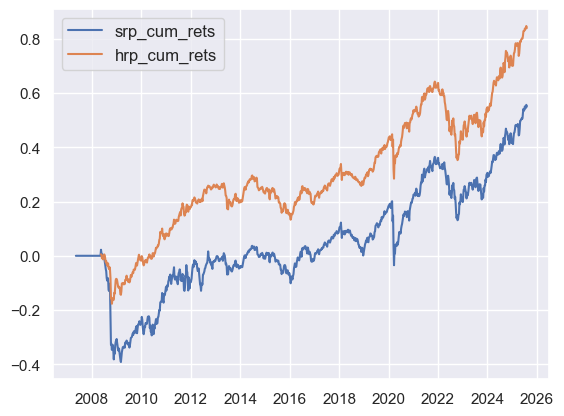

In [80]:
# SRP, HRP 포트폴리오 백테스팅 결과 시각화
plt.plot(srp_cum_rets)
plt.plot(hrp_cum_rets)
plt.legend(['srp_cum_rets','hrp_cum_rets'], fontsize=12)

In [81]:
# SRP, HRP 샤프비율 계산 및 출력
srp_sharpe_ratio = srp_rets.mean() * np.sqrt(52) / srp_rets.std()
hrp_sharpe_ratio = hrp_rets.mean() * np.sqrt(52) / hrp_rets.std()
print("SRP_sharpe_ratio : ", round(srp_sharpe_ratio,4))
print("HRP_sharpe_ratio : ", round(hrp_sharpe_ratio,4))

SRP_sharpe_ratio :  0.281
HRP_sharpe_ratio :  0.5344


C:\Users\USER\anaconda3\envs\torch118\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\torch118\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\torch118\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54260 (\N{HANGUL SYLLABLE POL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\torch118\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\envs\torch118\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) Arial.
 

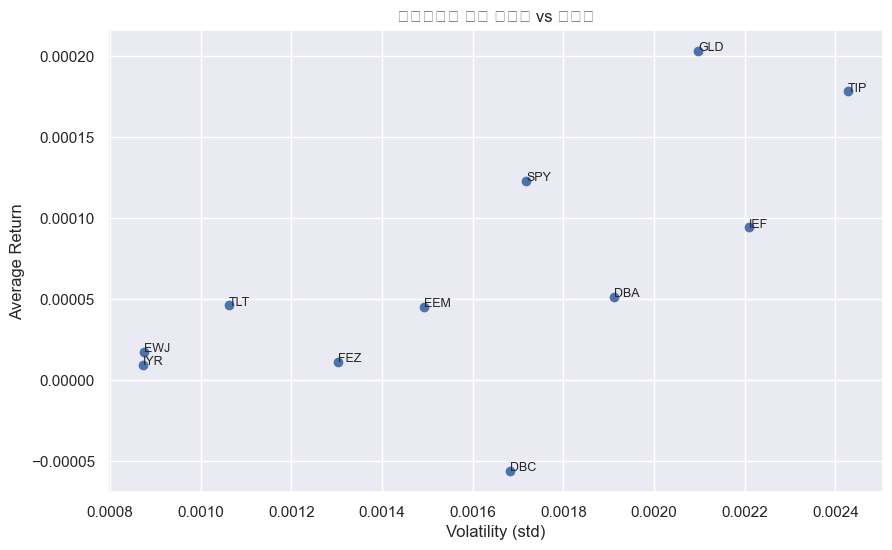

In [82]:
# 수익률-변동성 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(hrp_volatility, hrp_avg_returns)

for ticker in hrp_avg_returns.index:
    plt.text(hrp_volatility[ticker], hrp_avg_returns[ticker], ticker, fontsize=9)

plt.xlabel("Volatility (std)")
plt.ylabel("Average Return")
plt.title("포트폴리오 자산 수익률 vs 변동성")
plt.grid(True)
plt.show()

## ***** Agent 리밸런싱 결과 추적 *****

In [200]:
def calculate_single_week_portfolio_return(rets: pd.DataFrame, weights: pd.DataFrame):
    """
    최근 1주 수익률과 자산 비중을 입력 받아
    가중 수익률, 포트폴리오 수익률, 누적 수익률을 계산합니다.

    Parameters:
    - rets: 최근 1주 자산별 수익률 (1행 DataFrame)
    - weights: 해당 주에 적용할 자산별 비중 (1행 DataFrame)

    Returns:
    - asset_weighted_returns: 자산별 가중 수익률 (Series)
    - portfolio_return: 전체 포트폴리오 수익률 (float)
    - cumulative_return: 누적 수익률 (float, 단일 주 기준)
    """

    # 자산별 가중 수익률
    asset_weighted_returns = (rets.values * weights.values).flatten()

    # 포트폴리오 수익률
    portfolio_return = asset_weighted_returns.sum()

    return asset_weighted_returns, portfolio_return

In [164]:
last_index = hrp_asset_rets.index[-2]
last_weights = hrp_weights.iloc[-2]
Agent_weights = pd.DataFrame(index=[last_index], columns=hrp_asset_rets.columns)
Agent_weights

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
2025-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
Agent_weights.iloc[-1,:] = last_weights
Agent_weights

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
2025-07-27,0.056374,0.048523,0.018991,0.066256,0.141089,0.044659,0.314948,0.086425,0.082832,0.103466,0.036437


In [192]:
Agent_weights.iloc[-1,6] = 0.2649
Agent_weights.iloc[-1,7] = 0.1364
Agent_weights.iloc[-1,8] = 0.0528
Agent_weights

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
2025-07-27,0.056374,0.048523,0.018991,0.066256,0.141089,0.044659,0.2649,0.1364,0.0528,0.103466,0.036437


In [196]:
last_rets = rets.iloc[-1]
last_rets = last_rets.to_frame().T
last_rets

Ticker,SPY,FEZ,EWJ,EEM,IEF,TLT,TIP,GLD,DBC,DBA,IYR
2025-08-03,-0.024141,-0.052396,-0.021274,-0.026459,0.013221,0.019966,0.005516,0.005563,-0.003608,-0.015721,-0.030591


In [204]:
results = calculate_single_week_portfolio_return(last_rets, Agent_weights)
results[0]

array([-0.001360895135223136, -0.002542426976084265,
       -0.0004040071230747372, -0.0017530935167377841,
       0.0018653374662875525, 0.0008916822595512773,
       0.0014612217267826794, 0.000758760049133911,
       -0.00019052755783236907, -0.0016265711562051348,
       -0.00111466977712297], dtype=object)

In [206]:
results[1]

-0.004015189740524976

In [210]:
hrp_asset_rets.iloc[-1].sum()

np.float64(-0.004139109092732395)